In [1]:

%pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [9]:

import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Smakbv09@',
    port='3306',
    database='Chatbot_Data'
)


In [4]:

mycursor = mydb.cursor()

mycursor.execute('SELECT * FROM Add_on')

add_on_data = mycursor.fetchall()

for data in add_on_data:
    print(data)
    

('Ciabatta bagel (Gourmet upgrade)', 0.7, 0.74, 70)
('Add Egg', 1.29, 1.37, 90)
('Add Egg white', 1.39, 1.47, 30)
('Add Almond milk', 0.99, 1.05, 40)
('Add expresso shot', 0.99, 1.05, 3)
('Add soy milk', 0.99, 1.05, 16)
('Add syrup', 0.99, 1.05, 40)
('Add whip cream', 0.99, 1.05, 20)
('Dasani water 16.9oz', 1.68, 1.78, 0)
('Add Avacado', 1.49, 1.58, 50)
('Add cheese 0.5oz(American cheese/cheddar cheese/swiss cheese)', 0.89, 0.94, 100)
('Add cream cheese(plain/jalapeno/honey almond/strawberry/onion chive/veggie)', 1.99, 2.11, 120)
('Add Meat(Chicken/Bacon/ Ham/Turkey sausage/Turkey)', 2.19, 2.32, 80)
('Add 2nd veg(onion/tomato/spinach/lettuce/cucumber/jalapenos)', 0.99, 1.05, 15)
('Add sauce(chipotle mayo/tomato shmear)', 0.99, 1.05, 5)


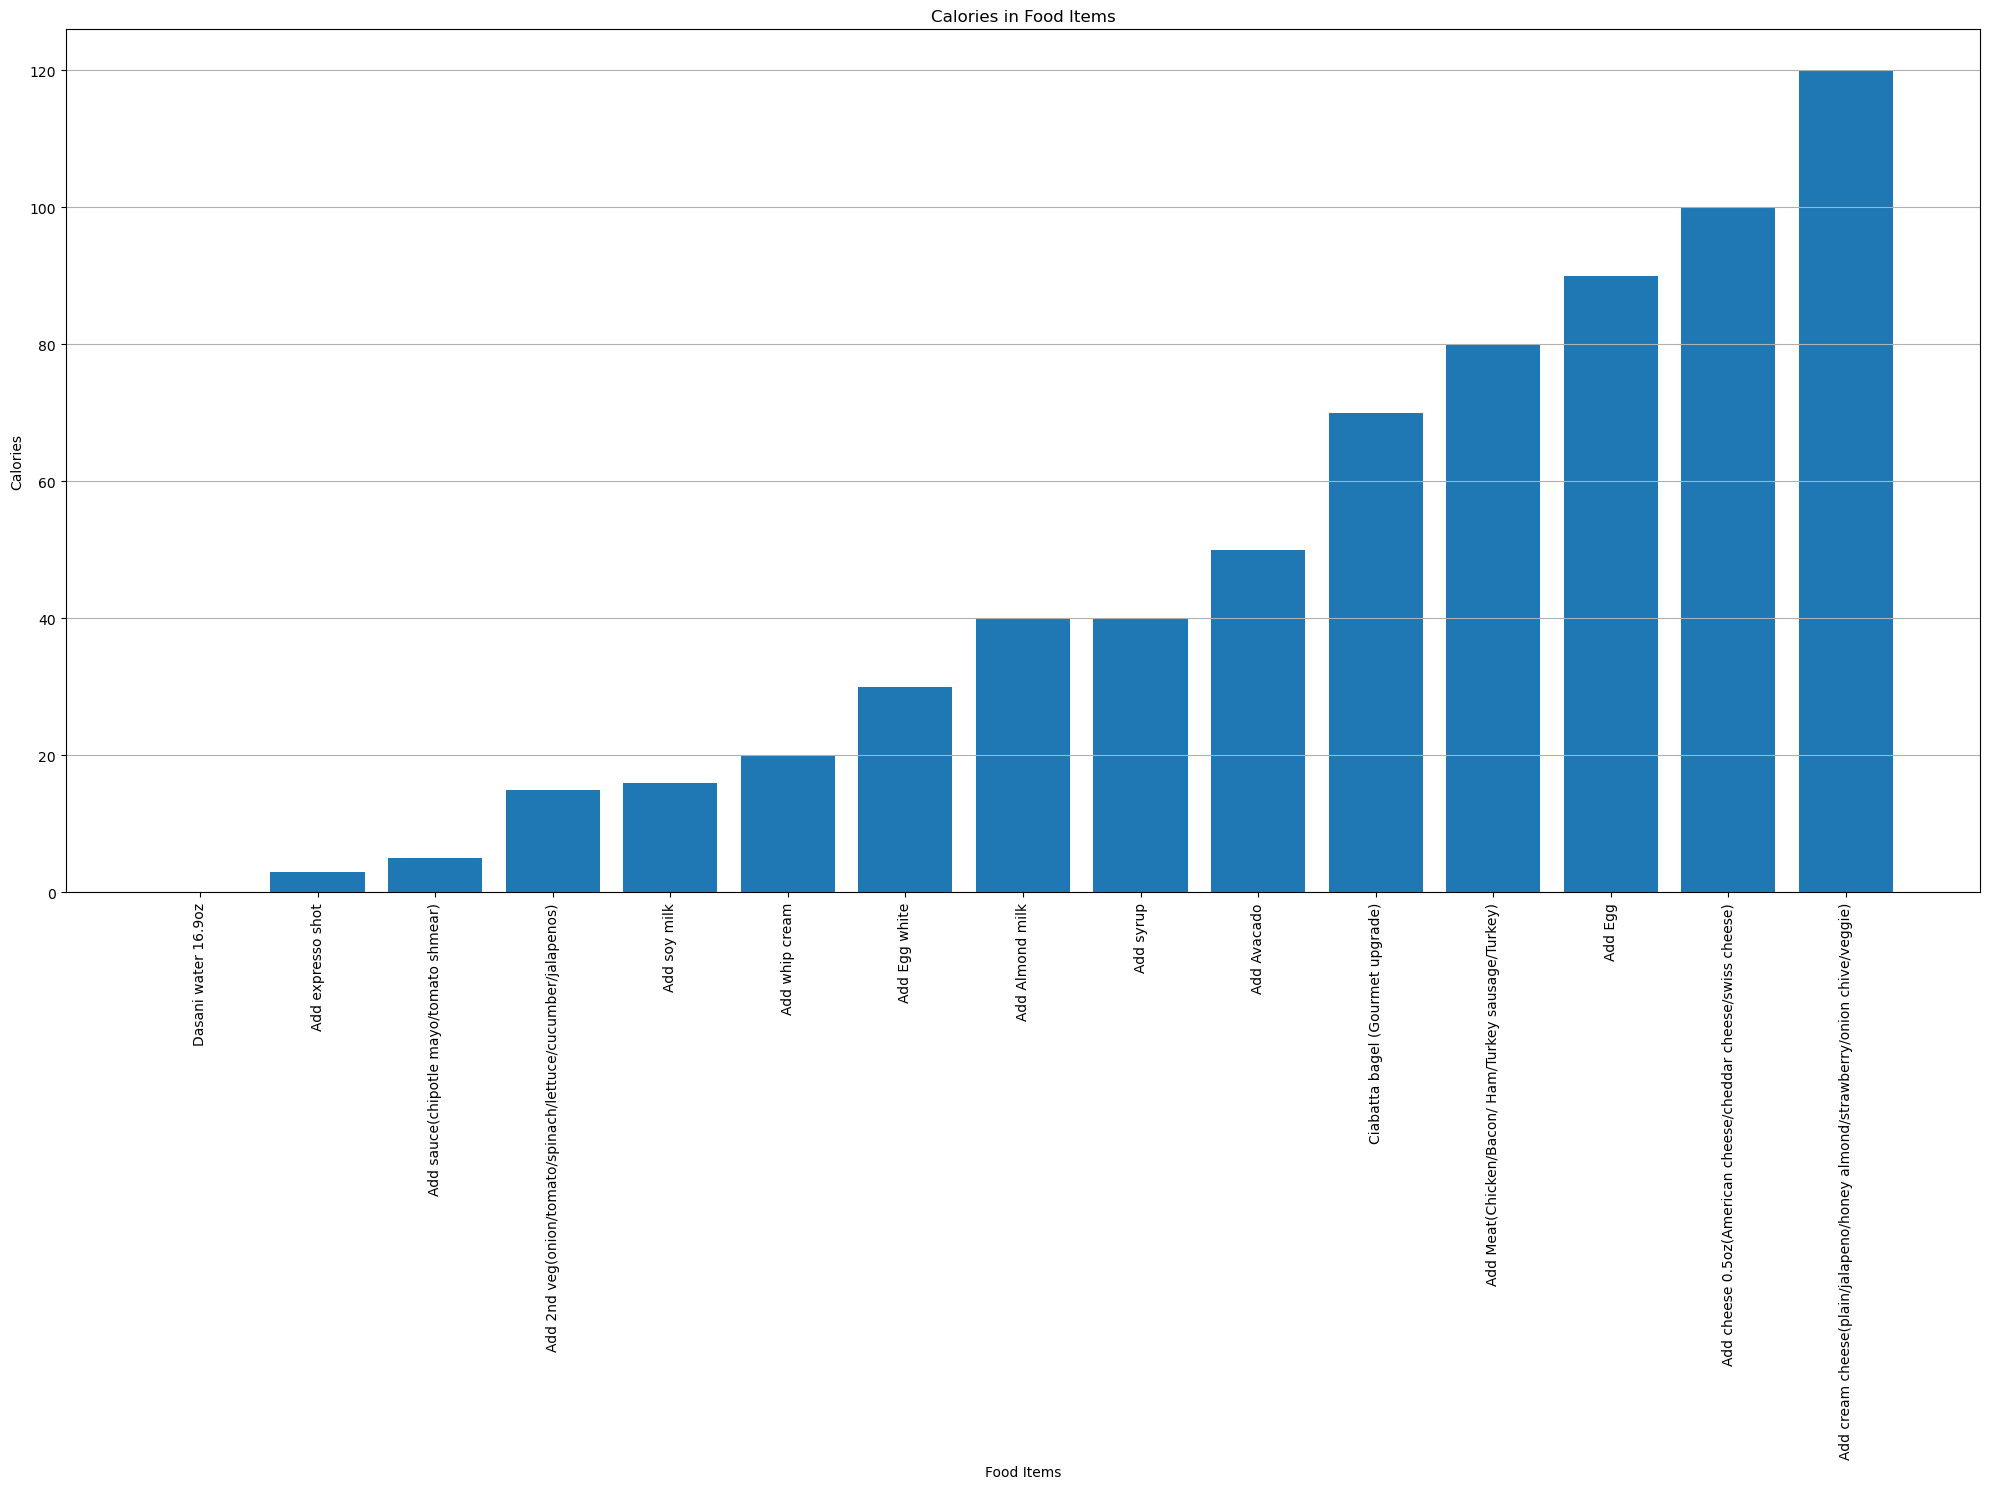

In [8]:

columns_add_on = ['Add on type', 'Price', 'Price + Tax', 'Calories']

df_add_on = pd.DataFrame(add_on_data, columns = columns_add_on)

# Sort the DataFrame by the 'Calories' column
df_add_on_sorted = df_add_on.sort_values(by='Calories')

# Create a bar graph
plt.figure(figsize=(20, 15))
plt.bar(df_add_on_sorted['Add on type'], df_add_on_sorted['Calories'])
plt.title('Calories in Food Items')
plt.xlabel('Food Items')
plt.ylabel('Calories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for y-axis
plt.tight_layout()
plt.show()


Maximum Price: 2.19 for item: Add Meat(Chicken/Bacon/ Ham/Turkey sausage/Turkey)
Minimum Price: 0.7 for item: Ciabatta bagel (Gourmet upgrade)


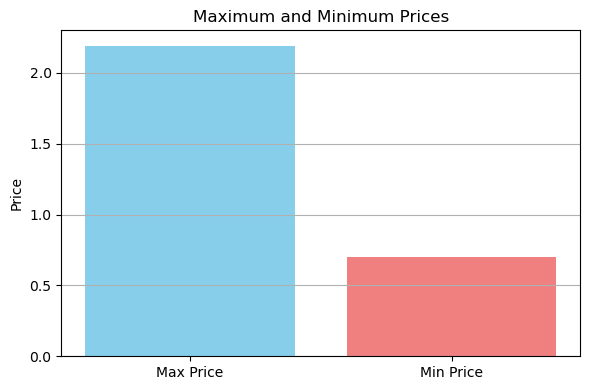

In [18]:

max_price = df_add_on['Price'].max()
min_price = df_add_on['Price'].min()

# Get the items corresponding to max and min prices
max_price_item = df_add_on.loc[df_add_on['Price'] == max_price, 'Add on type'].values[0]
min_price_item = df_add_on.loc[df_add_on['Price'] == min_price, 'Add on type'].values[0]

# Display the results
print(f"Maximum Price: {max_price} for item: {max_price_item}")
print(f"Minimum Price: {min_price} for item: {min_price_item}")

# Plotting the bar graph for max and min prices
plt.figure(figsize=(6, 4))
plt.bar(['Max Price', 'Min Price'], [max_price, min_price], color=['skyblue', 'lightcoral'])
plt.title('Maximum and Minimum Prices')
plt.ylabel('Price')
plt.grid(axis='y')  # Add grid lines for y-axis
plt.tight_layout()
plt.show()


In [21]:

mycursor.execute('SELECT * FROM drinks')

drinks_data = mycursor.fetchall()

for data in drinks_data:
    print(data)
    

('CB shake vanilla (Medium)', 5.79, 6.14, 'cold brew, vanilla syrup, shakemix', 350)
('CB shake vanilla x(Large)', 6.09, 6.46, 'cold brew, vanilla syrup, shakemix', 540)
('CB shake caramel (Medium)', 5.79, 6.14, 'cold brew, caramel syrup, shakemix', 390)
('CB shake caramel (Large)', 6.09, 6.46, 'cold brew, caramel syrup, shakemix', 620)
('CB shake choc (Medium)', 5.79, 6.14, 'cold brew, choclate syrup, shakemix', 380)
('CB shake choc (Large)', 6.09, 6.46, 'cold brew, choclate syrup, shakemix', 590)
('Cold brew (Medium)', 4.39, 4.65, 'cold brew, ice', 5)
('Cold brew (Large)', 4.89, 5.18, 'cold brew, ice', 5)
('CB vanilla (Medium)', 4.39, 4.65, 'cold brew, vanilla syrup', 180)
('CB vanilla (Large)', 4.89, 5.18, 'cold brew, vanilla syrup', 310)
('CB caramel (Medium)', 4.39, 4.65, 'cold brew, caramel syrup', 210)
('CB caramel (Large)', 4.89, 5.18, 'cold brew, caramel syrup', 360)
('CB chocolate (Medium)', 4.39, 4.65, 'cold brew, chocolate syrup', 200)
('CB chocolate (Large)', 4.89, 5.18, '

In [22]:

columns_drink = ['Items', 'Price', 'Price + Tax', 'Ingredients', 'Calories']

df_drink = pd.DataFrame(drinks_data, columns = columns_drink)


                       Items  Price  Price + Tax  \
0  CB shake vanilla (Medium)   5.79         6.14   
1  CB shake vanilla x(Large)   6.09         6.46   
2  CB shake caramel (Medium)   5.79         6.14   
3   CB shake caramel (Large)   6.09         6.46   
4     CB shake choc (Medium)   5.79         6.14   

                           Ingredients  Calories  
0   cold brew, vanilla syrup, shakemix       350  
1   cold brew, vanilla syrup, shakemix       540  
2   cold brew, caramel syrup, shakemix       390  
3   cold brew, caramel syrup, shakemix       620  
4  cold brew, choclate syrup, shakemix       380  


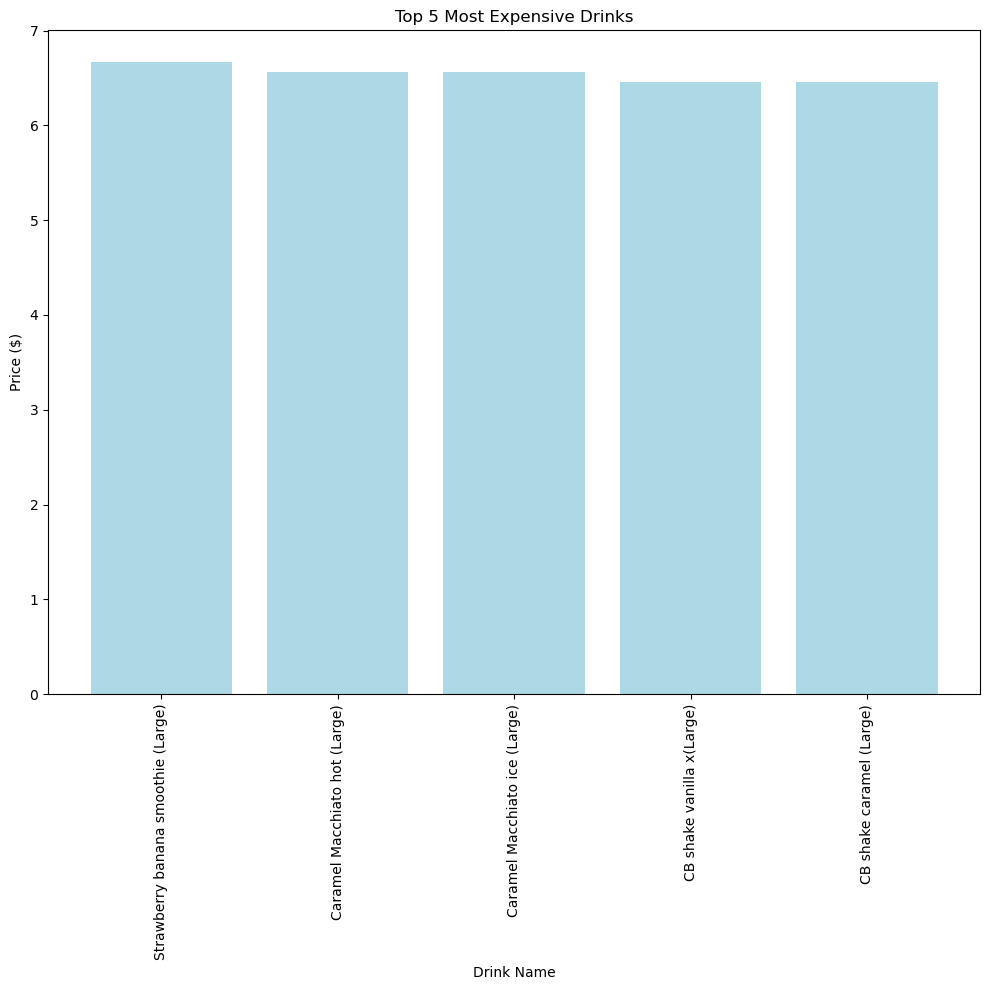

In [28]:

# Get the top 5 most expensive drinks
top_5_expensive_drinks = df_drink.nlargest(5, 'Price + Tax')

# Plotting the bar graph for top 5 expensive drinks
plt.figure(figsize=(10, 10))
plt.bar(top_5_expensive_drinks['Items'], top_5_expensive_drinks['Price + Tax'], color='lightblue')
plt.title('Top 5 Most Expensive Drinks')
plt.xlabel('Drink Name')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


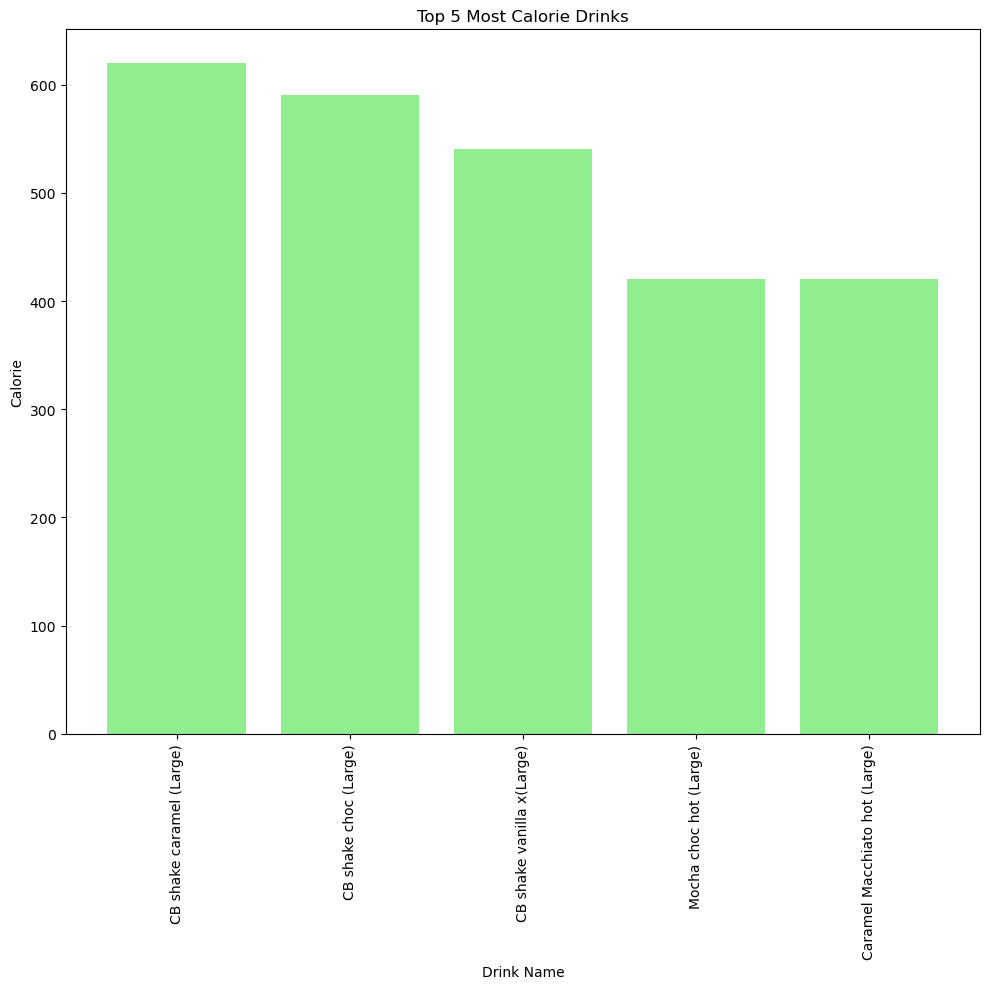

In [29]:

# Get the top 5 most expensive drinks
top_5_expensive_drinks = df_drink.nlargest(5, 'Calories')

# Plotting the bar graph for top 5 expensive drinks
plt.figure(figsize=(10, 10))
plt.bar(top_5_expensive_drinks['Items'], top_5_expensive_drinks['Calories'], color='lightgreen')
plt.title('Top 5 Most Calorie Drinks')
plt.xlabel('Drink Name')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Calorie')
plt.tight_layout()
plt.show()